# TERM DEPOSIT SUBSCRIPTION PREDICTON

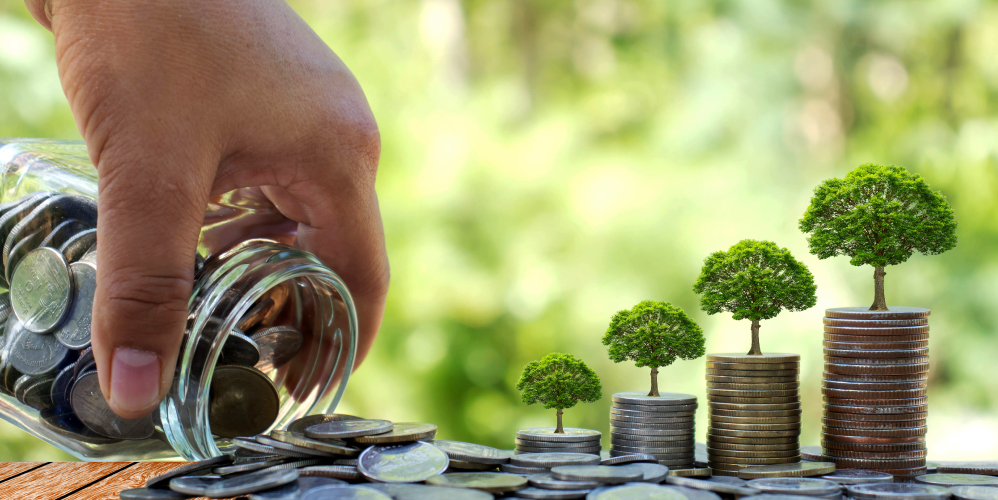

# PROBLEM STATEMENT : 

## To address the challenges of banking telecallers when they call blindly to people in order to sell term deposit plans. The aim here is to find the most accurate prediction of whether a person to be called will subscribe to the term deposit plan or not using any of the machine learning algorithms.  Historical data can be used which consists of different features of customers and whether they subscribed to the plan or not. Using this data, the participants need to build a machine learning model in order to make predictions

In [1]:
# Importing necessary basic packages
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('train 2.csv')

In [3]:
dg = pd.read_csv('test2.csv')

In [4]:
df = df1.copy()

In [5]:
dg1 = dg.copy()

In [6]:
df1.shape

(21000, 17)

In [7]:
df1.describe()

age       balance           day      duration      campaign  \
count  21000.000000  21000.000000  21000.000000  20948.000000  21000.000000   
mean      36.997952   1607.497810     11.056571    263.981144      2.013381   
std       10.484725   2991.187132      7.450415    287.831246      1.575916   
min       19.000000  -2072.000000      1.000000      4.000000      1.000000   
25%       29.000000    299.000000      5.000000     94.000000      1.000000   
50%       35.000000    633.000000     10.000000    184.000000      2.000000   
75%       45.000000   1875.000000     16.000000    319.000000      2.000000   
max       87.000000  71188.000000     31.000000   2703.000000     28.000000   

              pdays      previous        y_bool  
count  21000.000000  21000.000000  21000.000000  
mean       3.231952      0.102524      0.269095  
std       23.161489      0.664355      0.443500  
min       -1.000000      0.000000      0.000000  
25%       -1.000000      0.000000      0.000000  
50%       -1.000000      0.000000      0.000000  
75%       -1.000000      0.000000      1.000000  
max      437.000000     14.000000      1.000000

In [8]:
df1.sample(10)

age          job   marital  education default  balance housing loan  \
8239    34  blue-collar   married  secondary      no      481      no   no   
11238   45   technician   married  secondary      no      379     yes  yes   
2166    27   technician  divorced   tertiary      no      547     yes   no   
7090    52   technician   married  secondary      no      374     yes  yes   
16460   23   technician  divorced    primary      no      266     yes   no   
20197   22      retired   married    primary      no      586     yes  yes   
15382   27  blue-collar    single  secondary      no     1209     yes   no   
2631    47  blue-collar   married    unknown      no      585      no   no   
16362   22  blue-collar   married   tertiary      no      635      no   no   
18102   23  blue-collar   married  secondary      no      328     yes  yes   

         contact  day month  duration  campaign  pdays  previous poutcome  \
8239    cellular    9   nov     346.0         1     -1         0  failure   
11238   cellular   26   jul     236.0         1     -1         0  unknown   
2166     unknown   24   may     251.0         2     -1         0  failure   
7090    cellular   15   apr       7.0         2     -1         0  unknown   
16460    unknown   12   dec      90.0         2     -1         0  unknown   
20197   cellular   14   may     100.0         1     -1         0  unknown   
15382   cellular    3   jul     430.0         3     -1         0  unknown   
2631   telephone    9   jul     112.0         2     -1         0  unknown   
16362   cellular   28   nov     229.0         3     -1         0  failure   
18102   cellular   17   jul     344.0         3     -1         0  failure   

       y_bool  
8239        1  
11238       1  
2166        0  
7090        1  
16460       0  
20197       0  
15382       1  
2631        0  
16362       0  
18102       1

In [9]:
dg1.shape

(9000, 16)

In [10]:
dg1.sample(10)

age           job   marital  education default  balance housing loan  \
6840   45      services   married  secondary      no     1455      no   no   
7620   36   blue-collar   married    unknown      no     -154      no   no   
5821   50   blue-collar   married   tertiary      no     5653     yes   no   
7218   31   blue-collar   married   tertiary      no     1656     yes  yes   
1638   31       student   married  secondary      no     1708      no   no   
4558   45       retired  divorced  secondary      no      581     yes   no   
1671   32        admin.  divorced   tertiary     yes      745     yes   no   
389    45  entrepreneur    single  secondary      no     1365     yes   no   
4482   40       student   married   tertiary      no      792     yes   no   
8217   24   blue-collar   married    unknown     yes       97     yes   no   

       contact  day month  duration  campaign  pdays  previous poutcome  
6840  cellular   31   nov       218         1     -1         2  unknown  
7620  cellular    8   may       168         2     -1         0  failure  
5821  cellular    9   jun       162         1     -1         0  unknown  
7218   unknown    2   may       262         2     -1         0  unknown  
1638  cellular    7   aug       403         6     -1         0  unknown  
4558  cellular    4   jul       112         1     -1         0  failure  
1671  cellular    4   jun       113         1     -1         0  unknown  
389   cellular    3   jan       186         2     -1         0  unknown  
4482  cellular    8   apr        80         2     -1         0  unknown  
8217   unknown    3   jul       374         2     -1         3  failure

In [11]:
df.dtypes

age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration     float64
campaign       int64
pdays          int64
previous       int64
poutcome      object
y_bool         int64
dtype: object

# Attribute description :

## -> 'age': The age of the customer (numeric).
## -> 'job': The type of job the customer has (categorical). Example values: 'admin', 'blue-collar', 'technician', etc.
## -> 'marital': The marital status of the customer (categorical). Example values: 'married', 'single', 'divorced'.
## -> 'education': The educational background of the customer (categorical). Example values: 'primary', 'secondary', 'tertiary', 'unknown'.
## -> 'default': Whether the customer has a credit default (categorical). Values are 'yes' or 'no'.
## -> 'balance': The current balance in the customer's account (numeric).
## -> 'housing': Whether the customer has a housing loan (categorical). Values are 'yes' or 'no'.
## -> 'loan': Whether the customer has a personal loan (categorical). Values are 'yes' or 'no'.
## -> 'contact': The method of communication used to contact the customer (categorical). Example values: 'cellular', 'telephone', 'unknown'.
## -> 'day': The day of the month when the customer was last contacted (numeric).
## -> 'month': The month of the year when the customer was last contacted (categorical). Example values: 'jan', 'feb', 'mar', etc.
## -> 'duration': The duration (in seconds) of the last contact with the customer (numeric).
## -> 'campaign': The number of contacts performed during this campaign for the customer (numeric).
## -> 'pdays': The number of days that passed by after the customer was last contacted from a previous campaign (numeric). -1 means the customer was not previously contacted.
## -> 'previous': The number of contacts performed before this campaign for the customer (numeric).
## -> 'poutcome': The outcome of the previous marketing campaign (categorical). Example values: 'unknown', 'failure', 'other', 'success'.
## -> 'y_bool': The target variable indicating whether the customer subscribed to the term deposit plan or not (categorical). Values are 'yes' or 'no'.

## VISUALIZATIONS OF MISSING VALUES

In [12]:
df.isnull().sum()

age           0
job           0
marital       0
education    37
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration     52
campaign      0
pdays         0
previous      0
poutcome      0
y_bool        0
dtype: int64

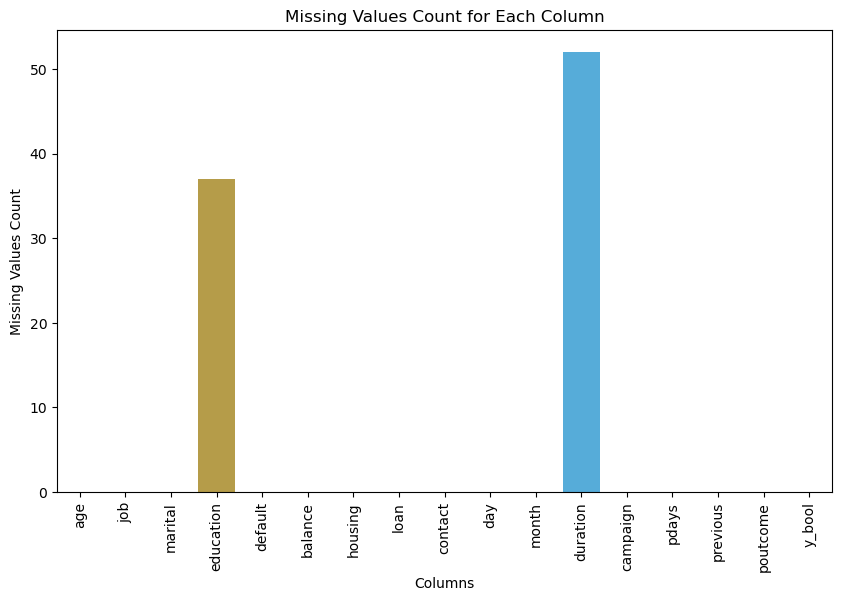

In [13]:
missing_values_count = df.isnull().sum()
missing_values_percentage = (missing_values_count / len(df)) * 100
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values_count.index, y=missing_values_count.values)
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Missing Values Count')
plt.title('Missing Values Count for Each Column')
plt.show()



### There are null values present in 'education' and 'duration'

In [14]:

df['education'] = df['education'].replace(np.NaN,df.education.mode()[0])

In [15]:

df['duration'] = df['duration'].replace(np.NaN,df.duration.median())

In [16]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y_bool       0
dtype: int64

### Thus we can see the null values are removed

## Outlier Removal

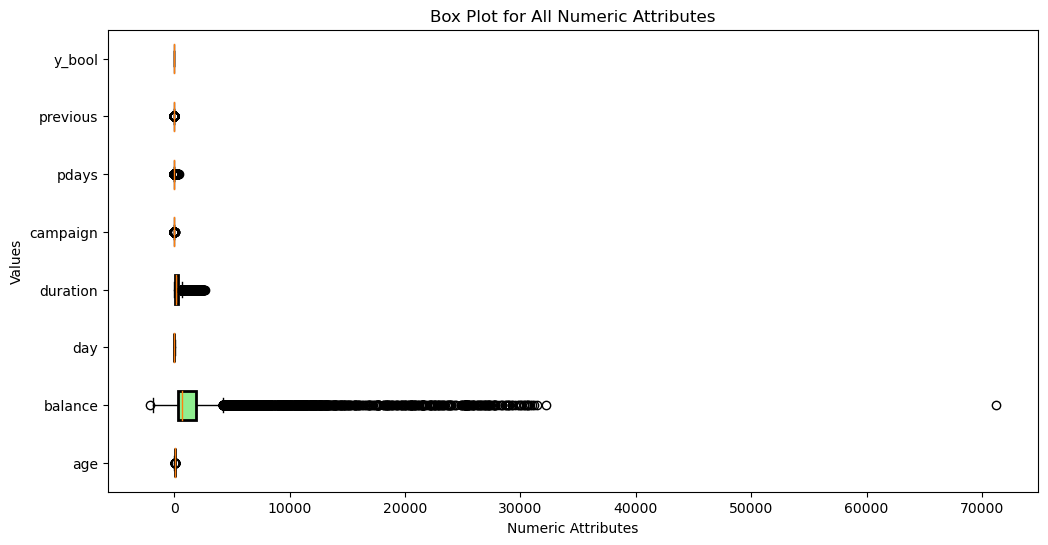

In [17]:
numeric_attributes = df.select_dtypes(include=['int64', 'float64'])


plt.figure(figsize=(12, 6))
boxplot = plt.boxplot(numeric_attributes.values, vert=False, labels=numeric_attributes.columns, patch_artist=True)
plt.xlabel('Numeric Attributes')
plt.ylabel('Values')
plt.title('Box Plot for All Numeric Attributes')


colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon']
for box, color in zip(boxplot['boxes'], colors):
    box.set(facecolor=color, linewidth=2)

plt.show()

In [18]:

numerical_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


for col in numerical_cols:
    q1 = np.percentile(df[col], 25)  
    q3 = np.percentile(df[col], 75)  
    iqr = q3 - q1  

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

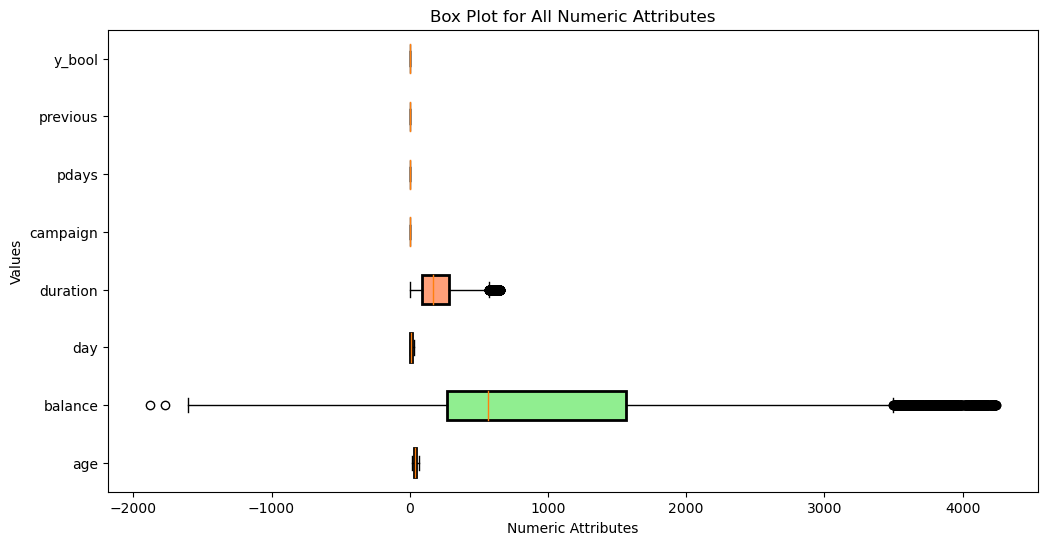

In [19]:
numeric_attributes = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12, 6))
boxplot = plt.boxplot(numeric_attributes.values, vert=False, labels=numeric_attributes.columns, patch_artist=True)
plt.xlabel('Numeric Attributes')
plt.ylabel('Values')
plt.title('Box Plot for All Numeric Attributes')


colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon']
for box, color in zip(boxplot['boxes'], colors):
    box.set(facecolor=color, linewidth=2)

plt.show()

### In subgroup analysis, you might apply outlier removal techniques separately to each subgroup or subset of the data. This means that outliers could still be present in some of these subsets, even if they were removed from the entire dataset

### Outliers are further not removed since Balance is an attribute which may be high and vary from person to person

### Thus from the above we can infer that outliers are removed

# Visualizations

### The peaks, valleys, and tails of each group's density curve can be compared to see where married, divorced, single are similar or different.

In [20]:
fig = px.violin(df, x='marital', y='age', box=True, points="all", color_discrete_sequence=px.colors.sequential.Viridis)
fig.update_layout(title='Violin Plot of Age by Marital Status', xaxis_title='Marital Status', yaxis_title='Age')
fig.show()

### The Violin reveals that the majority of individuals fall within the age range of 20 to 40

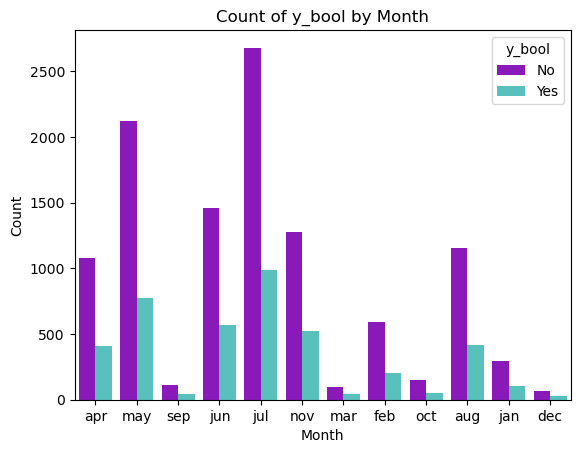

In [21]:
color_palette = ["darkviolet", "mediumturquoise"]  
sns.countplot(x='month', hue='y_bool', data=df, palette=color_palette)

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of y_bool by Month')

plt.legend(title='y_bool', labels=['No', 'Yes'])
plt.show()

## The countplot indicates that the months of July and May have the highest number of customer contacts during the marketing campaign.

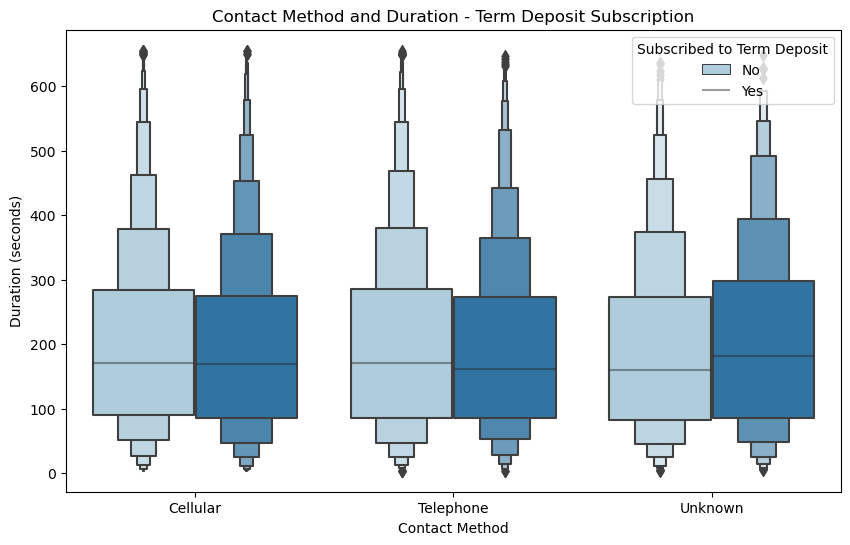

In [22]:
custom_palette = sns.color_palette('Paired', 3)

plt.figure(figsize=(10, 6))
sns.boxenplot(data=df, x='contact', y='duration', hue='y_bool', palette=custom_palette)
plt.xlabel('Contact Method')
plt.ylabel('Duration (seconds)')
plt.title('Contact Method and Duration - Term Deposit Subscription')
plt.legend(title='Subscribed to Term Deposit', loc='upper right', labels=['No', 'Yes'])
plt.xticks(ticks=[0, 1, 2], labels=['Cellular', 'Telephone', 'Unknown'])
plt.show()


## The Boxen plot reveals that the majority of call durations for the different contact methods fall within the range of 100 to 300 seconds.

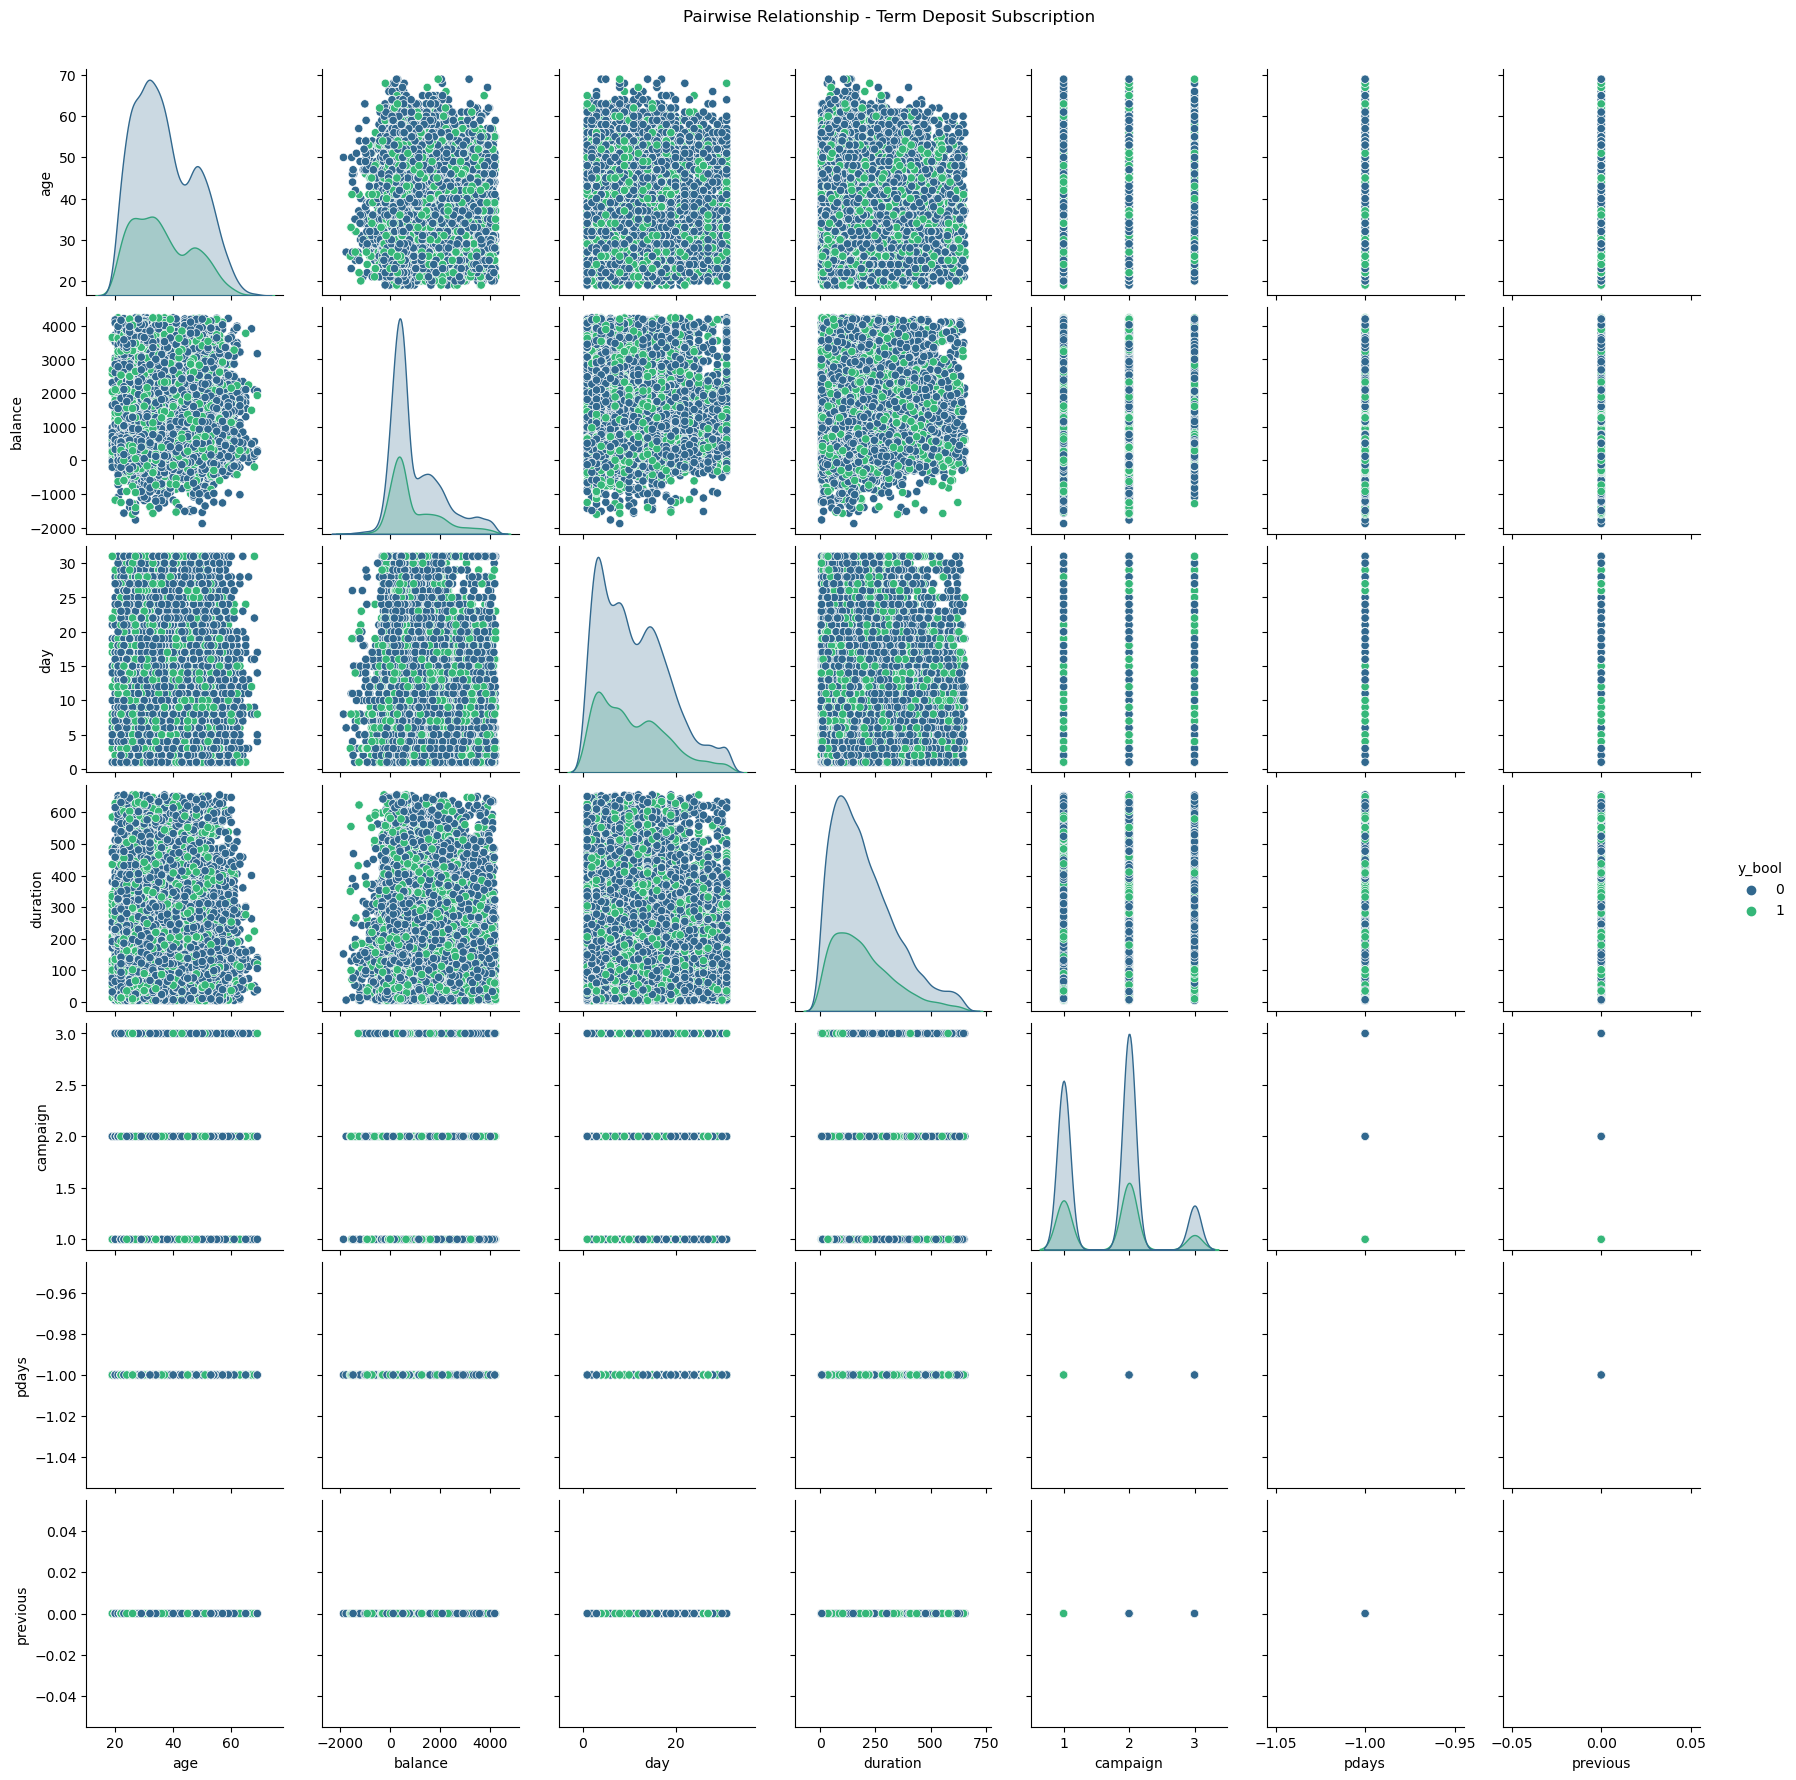

In [23]:
sns.pairplot(df, hue='y_bool', diag_kind='kde', palette='viridis')
plt.suptitle('Pairwise Relationship - Term Deposit Subscription', y=1.02)
plt.show()

## The above pairplot reveals that there is a slight skewness towards the left.

<Figure size 1000x600 with 0 Axes>

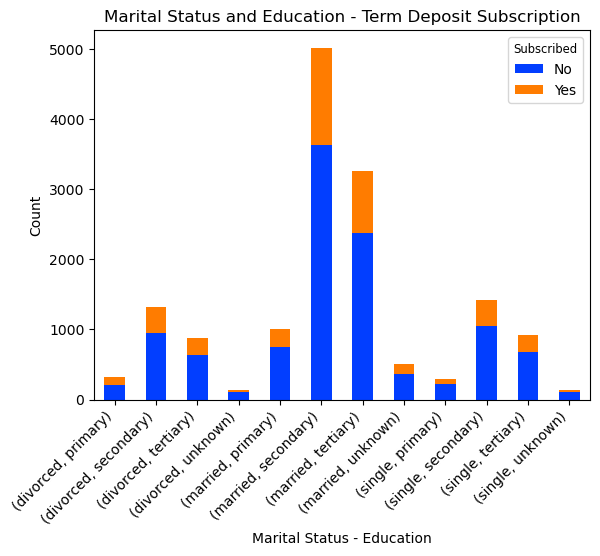

In [24]:
custom_palette = sns.color_palette("bright", 2)  # 2 represents the number of colors for 'No' and 'Yes'

plt.figure(figsize=(10, 6))
marital_education_counts = df.groupby(['marital', 'education', 'y_bool']).size().unstack(fill_value=0)

# Plot using the custom palette and adjust legend title size
ax = marital_education_counts.plot(kind='bar', stacked=True, color=custom_palette)
plt.xlabel('Marital Status - Education')
plt.ylabel('Count')
plt.title('Marital Status and Education - Term Deposit Subscription')
plt.legend(title='Subscribed', loc='upper right', labels=['No', 'Yes'], title_fontsize='small')
plt.xticks(rotation=45, ha='right')
plt.show()


## The bar plot indicates that there is a positive correlation between the attributes "marital" and "education." Specifically, it suggests that a higher number of individuals who are married tend to have a secondary or tertiary education background.

In [25]:
fig = px.scatter(df, x="age", y="balance", color="age", color_continuous_scale="viridis")
fig.show()

## People of age 60 has comparatively has less balance than the rest

In [26]:
colors = ['#FFC300', '#FF5733', '#C70039', '#900C3F', '#581845']  # Example colors, you can modify or add more

fig = go.Figure(data=[go.Bar(x=df['contact'].value_counts().index,
                             y=df['contact'].value_counts().values,
                             marker=dict(color=colors))])
fig.show()

## The customers prefer cellular mode of contact more than telephone

## Uni-variate visualizations: EDUCATION

In [27]:
import plotly.graph_objects as go
education_counts = df['education'].value_counts()

fig = go.Figure(go.Sunburst(
    labels=education_counts.index,
    parents=['Education'] * len(education_counts),
    values=education_counts.values,
))

fig.update_layout(
    title='Sunburst Chart of Education Counts',
    margin=dict(l=0, r=0, t=30, b=0), 
)

fig.show()


## The majority of customers have a secondary education background, while the smallest proportion has an unknown educational background.

## Uni-variate visualizations: MARITAL

In [28]:
counts = df['marital'].value_counts()
colors = ['lightblue', 'lightgreen', 'orange', 'lightpink', 'yellow']

fig = go.Figure(data=[go.Pie(labels=counts.index, values=counts, marker=dict(colors=colors))])

fig.update_traces(textposition='inside', textinfo='percent+label')

fig.update_layout(
    title='MARITAL - Term Deposit Subscription',
    legend=dict(orientation='v', x=0.02, y=0.5, title_text='Marital Status')  # Place the legend to the left of the plot
)

fig.show()


### The majority of customers in the dataset are married, while the minority are divorced.

## VISUALIZATIONS FOR CATEGORICAL COLUMNS WITH TARGET VARIABLE Y_BOOL

In [29]:
import plotly.express as px

categorical_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
colors = px.colors.qualitative.Plotly[:2]
for var in categorical_vars:
    fig = px.histogram(df, x=var, color='y_bool', barmode='group', color_discrete_sequence=colors)
    fig.update_layout(
        title=f'{var} Distribution by Subscriber Prediction',
        xaxis=dict(title=var),
        yaxis=dict(title='Count'),
        legend=dict(title='Subscriber Prediction'),
    )
    fig.show()

## From the above plots we can get a general insight on which attribute is minimum and maximum

## Correlation Matrix

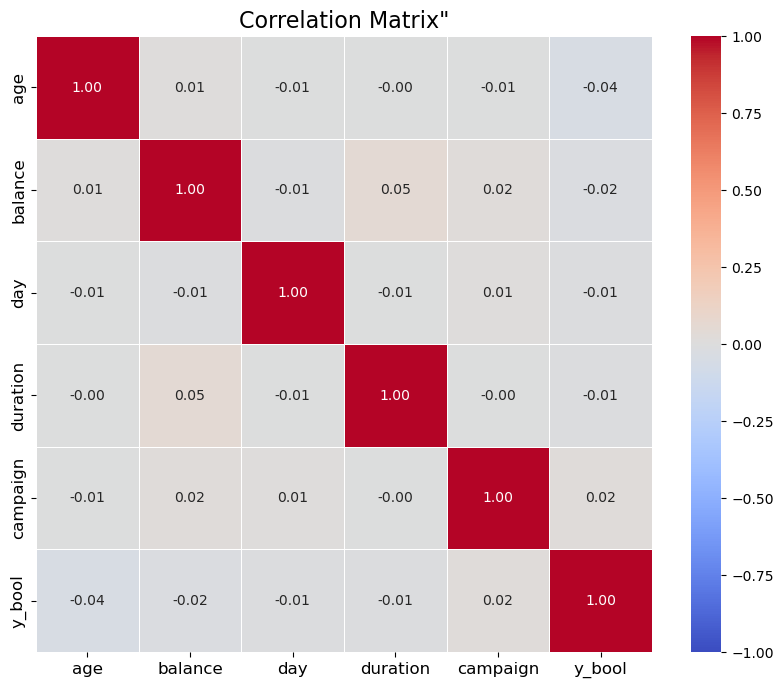

In [30]:

df_without_pdays_previous = df.drop(columns=['pdays', 'previous'])


corr_matrix = df_without_pdays_previous.corr()


cmap = sns.color_palette("coolwarm", as_cmap=True)


plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap=cmap, fmt=".2f", linewidths=0.5,
            vmin=-1, vmax=1, center=0, square=True, annot_kws={"size": 10})
plt.title('Correlation Matrix"', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [31]:
df_without_pdays_previous.corr()

age   balance       day  duration  campaign    y_bool
age       1.000000  0.014745 -0.005744 -0.002319 -0.005647 -0.043410
balance   0.014745  1.000000 -0.012036  0.048514  0.016934 -0.020258
day      -0.005744 -0.012036  1.000000 -0.005825  0.008587 -0.012584
duration -0.002319  0.048514 -0.005825  1.000000 -0.002892 -0.011068
campaign -0.005647  0.016934  0.008587 -0.002892  1.000000  0.017380
y_bool   -0.043410 -0.020258 -0.012584 -0.011068  0.017380  1.000000

## 1) "Age" has a weak negative correlation with "y_bool" (-0.043410). This suggests that older customers are slightly less likely to subscribe to the service.
## 2) "Balance" has a weak negative correlation with "y_bool" (-0.020258). This implies that customers with higher balances are slightly less likely to subscribe.
## 3) "Duration" has a weak negative correlation with "y_bool" (-0.011068). Longer call durations during the campaign are slightly associated with lower subscription rates.
## 4) "Campaign" has a weak positive correlation with "y_bool" (0.017380). This suggests that more contacts made during the campaign are slightly associated with higher subscription rates.

# -----------------------------------------------------------------------------------------

# Label Encoding

## Since models cannot be build with categorical values I encode them with label-encoding

In [32]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [33]:
label_encoder_job = preprocessing.LabelEncoder()
df['job']= label_encoder_job.fit_transform(df['job'])
job_encoded = df['job']
job_original_labels = label_encoder_job.inverse_transform(job_encoded)


for unique_value in np.unique(job_encoded):
    
    original_label = label_encoder_job.inverse_transform([unique_value])[0]
    print(f"Index: {unique_value}, Label: {original_label}")

Index: 0, Label: admin.
Index: 1, Label: blue-collar
Index: 2, Label: entrepreneur
Index: 3, Label: housemaid
Index: 4, Label: management
Index: 5, Label: retired
Index: 6, Label: self-employed
Index: 7, Label: services
Index: 8, Label: student
Index: 9, Label: technician
Index: 10, Label: unemployed
Index: 11, Label: unknown


In [34]:
label_encoder_marital = preprocessing.LabelEncoder()
df['marital']= label_encoder_marital.fit_transform(df['marital'])
marital_encoded = df['marital']
marital_original_labels = label_encoder_marital.inverse_transform(marital_encoded)


for unique_value in np.unique(marital_encoded):
    
    original_label = label_encoder_marital.inverse_transform([unique_value])[0]
    print(f"Index: {unique_value}, Label: {original_label}")

Index: 0, Label: divorced
Index: 1, Label: married
Index: 2, Label: single


In [35]:
label_encoder_education = preprocessing.LabelEncoder()
df['education']= label_encoder_education.fit_transform(df['education'])
education_encoded = df['education']
education_original_labels = label_encoder_education.inverse_transform(education_encoded)


for unique_value in np.unique(education_encoded):
    
    original_label = label_encoder_education.inverse_transform([unique_value])[0]
    print(f"Index: {unique_value}, Label: {original_label}")

Index: 0, Label: primary
Index: 1, Label: secondary
Index: 2, Label: tertiary
Index: 3, Label: unknown


In [36]:
label_encoder_default = preprocessing.LabelEncoder()
df['default']= label_encoder_default.fit_transform(df['default'])
education_encoded = df['default']
education_original_labels = label_encoder_default.inverse_transform(education_encoded)


for unique_value in np.unique(education_encoded):
    
    original_label = label_encoder_default.inverse_transform([unique_value])[0]
    print(f"Index: {unique_value}, Label: {original_label}")

Index: 0, Label: no
Index: 1, Label: yes


In [37]:
label_encoder_housing = preprocessing.LabelEncoder()
df['housing']= label_encoder_housing.fit_transform(df['housing'])
education_encoded = df['housing']
education_original_labels = label_encoder_housing.inverse_transform(education_encoded)


for unique_value in np.unique(education_encoded):
    
    original_label = label_encoder_housing.inverse_transform([unique_value])[0]
    print(f"Index: {unique_value}, Label: {original_label}")

Index: 0, Label: no
Index: 1, Label: yes


In [38]:
label_encoder_loan = preprocessing.LabelEncoder()
df['loan']= label_encoder_loan.fit_transform(df['loan'])
education_encoded = df['loan']
education_original_labels = label_encoder_loan.inverse_transform(education_encoded)


for unique_value in np.unique(education_encoded):
   
    original_label = label_encoder_loan.inverse_transform([unique_value])[0]
    print(f"Index: {unique_value}, Label: {original_label}")

Index: 0, Label: no
Index: 1, Label: yes


In [39]:
label_encoder_contact = preprocessing.LabelEncoder()
df['contact']= label_encoder_contact.fit_transform(df['contact'])
education_encoded = df['contact']
education_original_labels = label_encoder_contact.inverse_transform(education_encoded)


for unique_value in np.unique(education_encoded):
    
    original_label = label_encoder_contact.inverse_transform([unique_value])[0]
    print(f"Index: {unique_value}, Label: {original_label}")

Index: 0, Label: cellular
Index: 1, Label: telephone
Index: 2, Label: unknown


In [40]:
label_encoder_month = preprocessing.LabelEncoder()
df['month']= label_encoder_month.fit_transform(df['month'])
education_encoded = df['month']
education_original_labels = label_encoder_month.inverse_transform(education_encoded)


for unique_value in np.unique(education_encoded):
    
    original_label = label_encoder_month.inverse_transform([unique_value])[0]
    print(f"Index: {unique_value}, Label: {original_label}")

Index: 0, Label: apr
Index: 1, Label: aug
Index: 2, Label: dec
Index: 3, Label: feb
Index: 4, Label: jan
Index: 5, Label: jul
Index: 6, Label: jun
Index: 7, Label: mar
Index: 8, Label: may
Index: 9, Label: nov
Index: 10, Label: oct
Index: 11, Label: sep


In [41]:
label_encoder_poutcome = preprocessing.LabelEncoder()
df['poutcome']= label_encoder_poutcome.fit_transform(df['poutcome'])
education_encoded = df['poutcome']
education_original_labels = label_encoder_poutcome.inverse_transform(education_encoded)


for unique_value in np.unique(education_encoded):
    
    original_label = label_encoder_poutcome.inverse_transform([unique_value])[0]
    print(f"Index: {unique_value}, Label: {original_label}")

Index: 0, Label: failure
Index: 1, Label: other
Index: 2, Label: success
Index: 3, Label: unknown


In [42]:
label_encoder = preprocessing.LabelEncoder()
dg['job']= label_encoder.fit_transform(dg['job'])
dg['marital']= label_encoder.fit_transform(dg['marital'])
dg['education']= label_encoder.fit_transform(dg['education'])
dg['housing']= label_encoder.fit_transform(dg['housing'])
dg['loan']= label_encoder.fit_transform(dg['loan'])
dg['contact']= label_encoder.fit_transform(dg['contact'])
dg['month']= label_encoder.fit_transform(dg['month'])
dg['poutcome']= label_encoder.fit_transform(dg['poutcome'])
dg['default']= label_encoder.fit_transform(dg['default'])

# -----------------------------------------------------------------------------------------

## CHECKING WHETHER THE DATASET IS BALANCED OR NOT

### CAN SEE THE DATA IS IMABALANCE

### SO WE PERFORM UP-SAMPLING

In [43]:
X = df.drop(['y_bool'], axis=1)

In [44]:
y = df['y_bool']

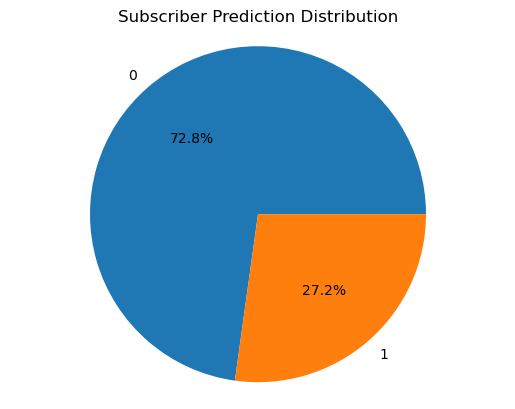

In [45]:

subscriber_counts = df['y_bool'].value_counts()
subscriber_percentages = subscriber_counts / len(df) * 100


plt.pie(subscriber_counts, labels=subscriber_counts.index, autopct='%1.1f%%')
plt.title('Subscriber Prediction Distribution')
plt.axis('equal')  
plt.show()

### From the above pie chart, we can observe that the data distribution is imbalanced, with one class dominating over the other. To address this issue and balance the dataset, we can utilize the Synthetic Minority Over-sampling Technique (SMOTE).

In [46]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X, y = smote.fit_resample(X, y)
df = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis=1)

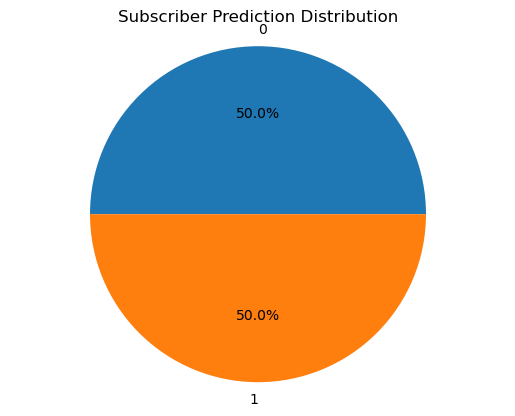

In [47]:
subscriber_counts = df['y_bool'].value_counts()
subscriber_percentages = subscriber_counts / len(df) * 100

plt.pie(subscriber_counts, labels=subscriber_counts.index, autopct='%1.1f%%')
plt.title('Subscriber Prediction Distribution')
plt.axis('equal') 

plt.show()

### This balanced dataset can help improve the performance and reliability of machine learning models, especially when dealing with imbalanced classification tasks.

In [48]:
df2 = df.copy()

# -----------------------------------------------------------------------------------------

## PERFORMING MODELS

### IMPORTING NECESSARY LIBRARIES

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Feature Selection using Random Forest Classifier

In [51]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

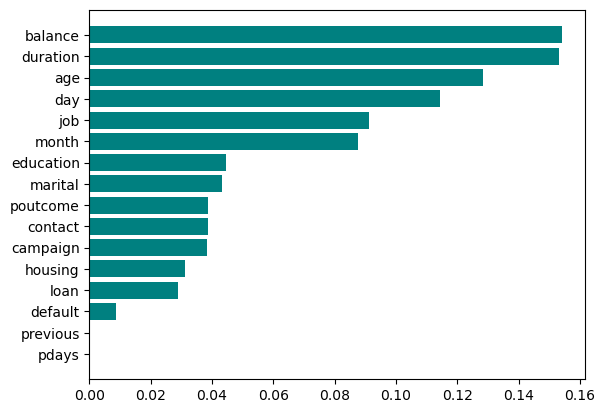

In [52]:
f_i = list(zip(df,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i],color='teal')
plt.show()

### In the above we can see 'previous' and 'pdays' has no importance at all, so the attributes can be removed

In [53]:
rfe = RFECV(rf, cv=5, scoring="neg_mean_squared_error")
rfe.fit(X_train, y_train)
selected_features = X_train.columns[rfe.get_support()].values

In [54]:
selected_features

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'previous', 'poutcome'], dtype=object)

In [55]:
X = df.drop(['y_bool','pdays','previous'], axis=1)

In [56]:
y = df['y_bool']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## LogisticRegression

In [58]:
model = LogisticRegression(solver='liblinear',C= 5.0)
model.fit(X_train, y_train)

LogisticRegression(C=5.0, solver='liblinear')

In [59]:
model.score(X_train,y_train)

0.6556859205776173

In [60]:
model.score(X_test,y_test)

0.6473375451263538

## RandomForestClassifier

In [61]:
model_rf = RandomForestClassifier(n_estimators=35,max_features='log2',min_samples_split=51)

In [62]:
model_rf.fit(X_train,y_train)

RandomForestClassifier(max_features='log2', min_samples_split=51,
                       n_estimators=35)

In [63]:
model_rf.score(X_train,y_train)

0.7796705776173285

In [64]:
model_rf.score(X_test,y_test)

0.7041967509025271

## Gradient Boosting Classifier

In [65]:
model_gbc = GradientBoostingClassifier(n_estimators = 150,max_depth=4,min_samples_split=10)

In [66]:
model_gbc.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=4, min_samples_split=10, n_estimators=150)

In [67]:
model_gbc.score(X_train,y_train)

0.7533844765342961

In [68]:
model_gbc.score(X_test,y_test)

0.7084837545126353

## Bagging Classifier

In [69]:
model_bc = BaggingClassifier(n_estimators=25,max_features=1)

In [70]:
model_bc.fit(X_train,y_train)

BaggingClassifier(max_features=1, n_estimators=25)

In [71]:
model_bc.score(X_train,y_train)

0.7911213898916968

In [72]:
model_bc.score(X_test,y_test)

0.7111913357400722

## SUPPORT VECTOR CLASSIFICATION

In [73]:
model_svc = SVC()

In [74]:
model_svc.fit(X_train,y_train)

SVC()

In [75]:
model_svc.score(X_train,y_train)

0.5248759025270758

In [76]:
model_svc.score(X_test,y_test)

0.5216606498194946

## GaussianNB

In [77]:
model_gnb = GaussianNB()

In [78]:
model_gnb.fit(X_train, y_train)

GaussianNB()

In [79]:
model_gnb.score(X_train,y_train)

0.6367328519855595

In [80]:
model_gnb.score(X_test,y_test)

0.6277075812274369

## Decision Tree

In [81]:
from sklearn.tree import DecisionTreeClassifier

In [82]:
model_dt = DecisionTreeClassifier(max_depth=9,criterion='entropy')

In [83]:
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9)

In [84]:
model_dt.score(X_train,y_train)

0.7083709386281588

In [85]:
model_dt.score(X_test,y_test)

0.6532039711191335

## XGBoost

In [86]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [87]:
model_xgb.score(X_train, y_train)

0.8680618231046932

In [88]:
model_xgb.score(X_test, y_test)

0.7143501805054152

## Scaled Aproach using ZScore

In [89]:
from scipy.stats import zscore

In [90]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
XScaled = X.apply(zscore)


X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size=0.2, random_state=0)

model_bc_sc = BaggingClassifier(n_estimators=25, max_features=1)
model_bc_sc.fit(X_train, y_train)


BaggingClassifier(max_features=1, n_estimators=25)

In [91]:
model_bc_sc.score(X_train,y_train)

0.7393953068592057

In [92]:
model_bc_sc.score(X_test,y_test)

0.6261281588447654

## The test is not improved

## So we apply a new scaling method

In [93]:
from sklearn.preprocessing import MinMaxScaler

In [94]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [95]:
model_bc_scm = BaggingClassifier()

In [96]:
model_bc_scm.fit(X_train,y_train)

BaggingClassifier()

In [97]:
model_bc_scm.score(X_train,y_train)

0.9854467509025271

In [98]:
model_bc_scm.score(X_test,y_test)

0.6926895306859205

## Still the model score is not improved. Thus we try another approach by removing skewness

## Now trying a different approach by removing skewness

In [99]:
skewness_values = df2.skew()
print(skewness_values)

age          0.464038
job          0.316487
marital      0.009931
education    0.268704
default      5.306657
balance      1.160144
housing      0.206338
loan         1.734442
contact      0.864977
day          0.709141
month       -0.341955
duration     0.903978
campaign     0.450671
pdays        0.000000
previous     0.000000
poutcome    -1.271474
y_bool       0.000000
dtype: float64


In [100]:
df['balance'] = np.sqrt(df['balance'])
df['duration'] = np.sqrt(df['duration'])
skewness_values_sqrt = df[['balance', 'duration']].skew()
print(skewness_values_sqrt)

balance     0.543411
duration    0.099852
dtype: float64


In [101]:
median_balance = df['balance'].median()
df['balance'].fillna(median_balance, inplace=True)

In [102]:
X = df2.drop(['y_bool','pdays','previous'], axis=1)

In [103]:
y = df2['y_bool']

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Gradient Boosting Classifier (with skewness removed)

In [105]:
model_gbcsk = GradientBoostingClassifier(n_estimators = 150,max_depth=4,min_samples_split=10)
model_gbcsk.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=4, min_samples_split=10, n_estimators=150)

In [106]:
model_gbcsk.score(X_train,y_train)

0.7533844765342961

In [107]:
model_gbcsk.score(X_test,y_test)

0.7084837545126353

## Bagging Classifier (with skewness removed)

In [153]:
model_bcsk = BaggingClassifier(n_estimators=25,max_features=1)
model_bcsk.fit(X_train,y_train)

BaggingClassifier(max_features=1, n_estimators=25)

In [154]:
model_bcsk.score(X_train,y_train)

0.7823217509025271

In [152]:
model_bcsk.score(X_test,y_test)

0.746841155234657

### Here we can infer the model score has increased

# -----------------------------------------------------------------------------------------

## EVALUATING THE MODEL

In [111]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

classifiers = ['Logistic_Regression', 'BaggingClassifier', 'SVC', 'RandomForest','GradientBoostingClassifier','GaussianNB','DECISION TREE CLASSIFIER','Bagging Classifier skewed','Gradient Boosting Classifier skewed']
models = [model, model_bc, model_svc, model_rf,model_gbc,model_gnb,model_dt,model_bcsk,model_gbcsk]

for classifier, model in zip(classifiers, models):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)  
    recall = recall_score(y_test, y_pred, pos_label=1)  
    f1 = f1_score(y_test, y_pred, pos_label=1)  

    print("Model: ", classifier)
    print("Accuracy: ", accuracy)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1-score: ", f1)
    print("-------------------------------------------")

Model:  Logistic_Regression
Accuracy:  0.6473375451263538
Precision:  0.6414516834280717
Recall:  0.6638009049773755
F1-score:  0.6524349566377584
-------------------------------------------
Model:  BaggingClassifier
Accuracy:  0.7111913357400722
Precision:  0.7470775770456961
Recall:  0.6361990950226244
F1-score:  0.6871945259042034
-------------------------------------------
Model:  SVC
Accuracy:  0.5216606498194946
Precision:  0.5178997613365155
Recall:  0.5891402714932127
F1-score:  0.5512277730736663
-------------------------------------------
Model:  RandomForest
Accuracy:  0.7041967509025271
Precision:  0.7509771077610273
Recall:  0.6085972850678733
F1-score:  0.6723319170207447
-------------------------------------------
Model:  GradientBoostingClassifier
Accuracy:  0.7084837545126353
Precision:  0.7344228804902962
Recall:  0.6506787330316742
F1-score:  0.6900191938579655
-------------------------------------------
Model:  GaussianNB
Accuracy:  0.6277075812274369
Precision:  0.

## From the above results, we can infer the following in short:

## 1.The models "Bagging Classifier skewed" and "Gradient Boosting Classifier skewed" outperform other models in terms of accuracy, precision, and F1-score.
## 2.The "RandomForest" model also performs well with high accuracy and precision, but slightly lower recall compared to the skewed versions of the classifiers.
## 3.The "SVC" model shows the lowest performance among all models with relatively low accuracy, precision, recall, and F1-score.
## 4.Overall, ensemble models like "BaggingClassifier" and "GradientBoostingClassifier" tend to perform better than individual classifiers like "Logistic_Regression" and "GaussianNB."
## 5.The results also indicate that some models may perform differently on skewed data compared to the original data, as seen in the "skewed" versions of the Bagging and Gradient Boosting classifiers.

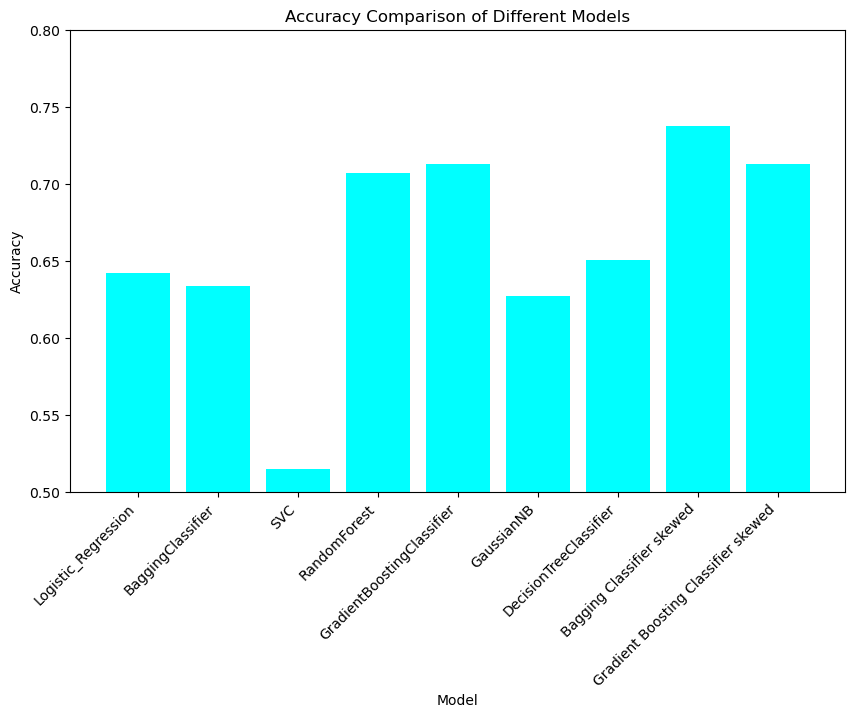

In [112]:
import matplotlib.pyplot as plt


accuracies = [0.642, 0.634, 0.515, 0.707, 0.713, 0.627, 0.651, 0.738, 0.713]


classifiers = ['Logistic_Regression', 'BaggingClassifier', 'SVC', 'RandomForest',
               'GradientBoostingClassifier', 'GaussianNB', 'DecisionTreeClassifier',
               'Bagging Classifier skewed', 'Gradient Boosting Classifier skewed']


plt.figure(figsize=(10, 6))
plt.bar(classifiers, accuracies, color='cyan') 
plt.xticks(rotation=45, ha='right')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.ylim(0.5, 0.8)  
plt.show()


## From the above we can clearly see that Bagging Classifier (with skewness removed) has the most accuracy

In [113]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

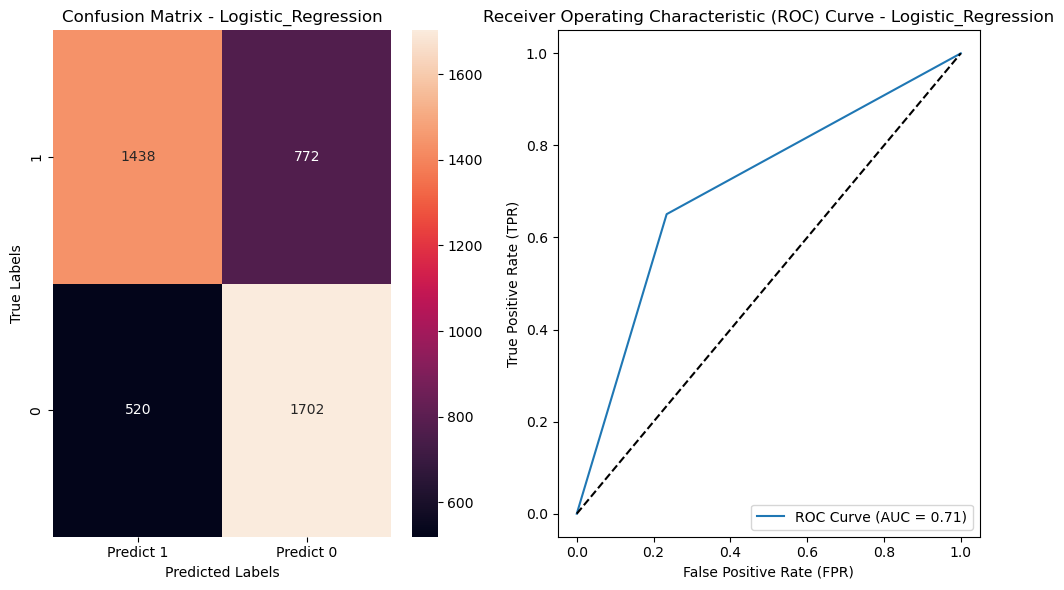

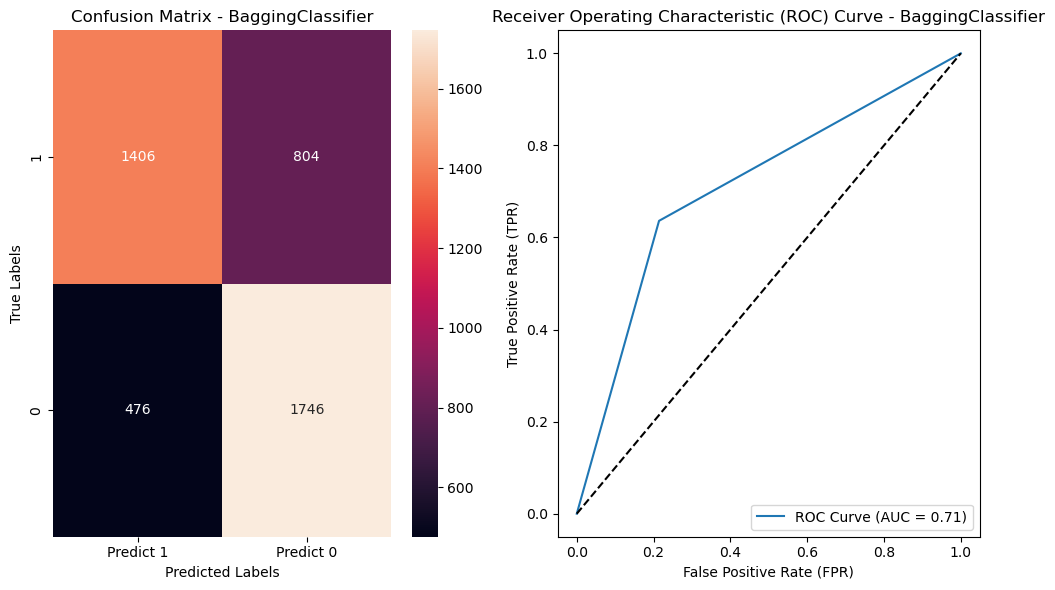

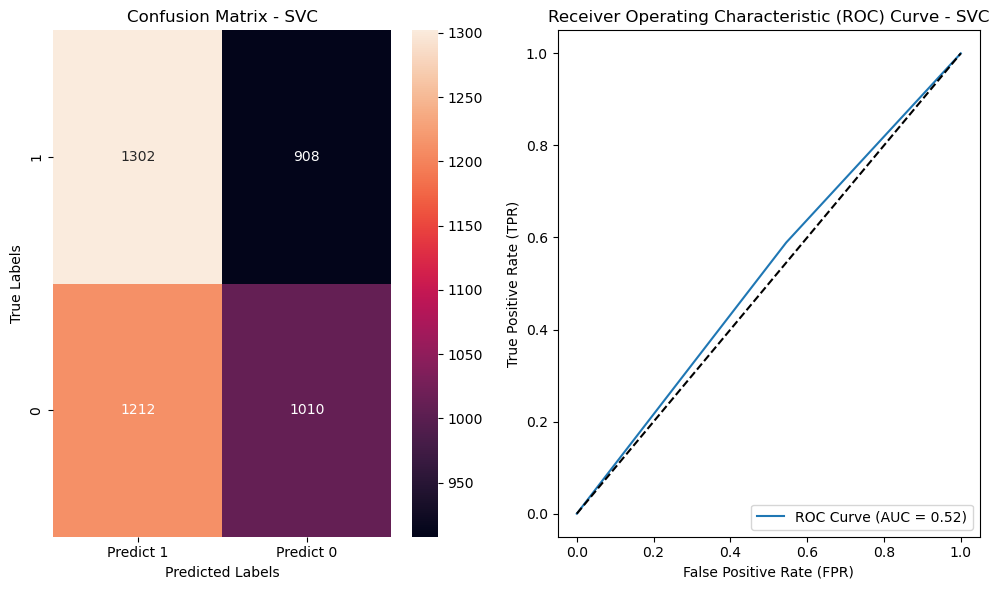

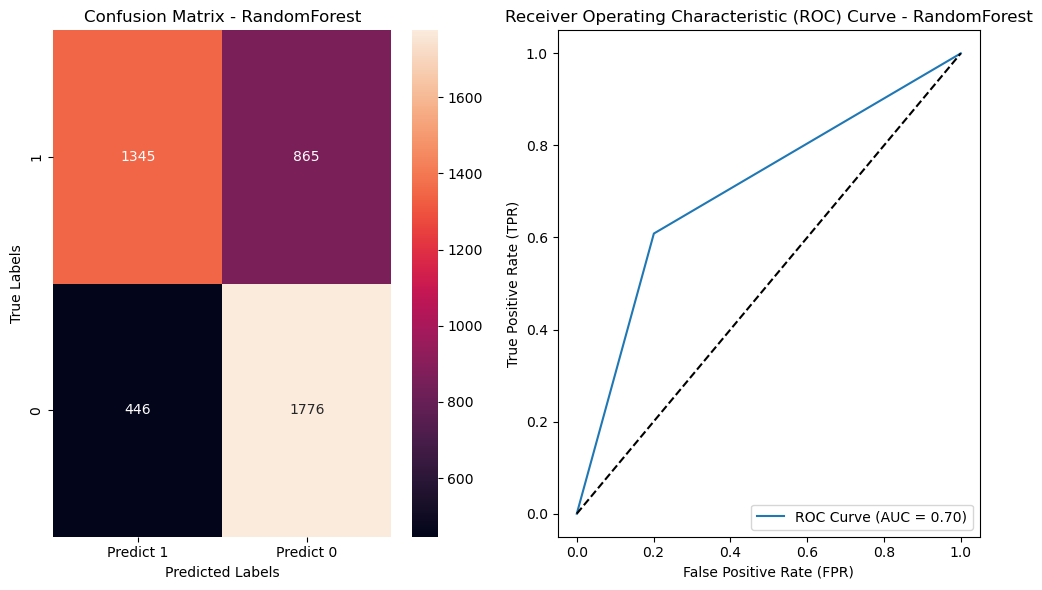

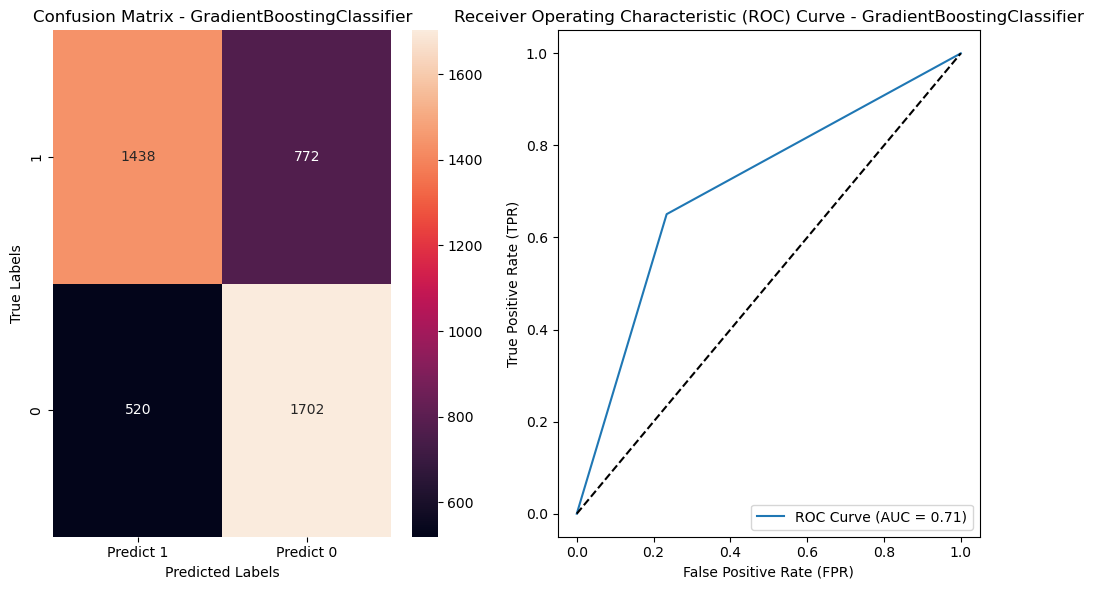

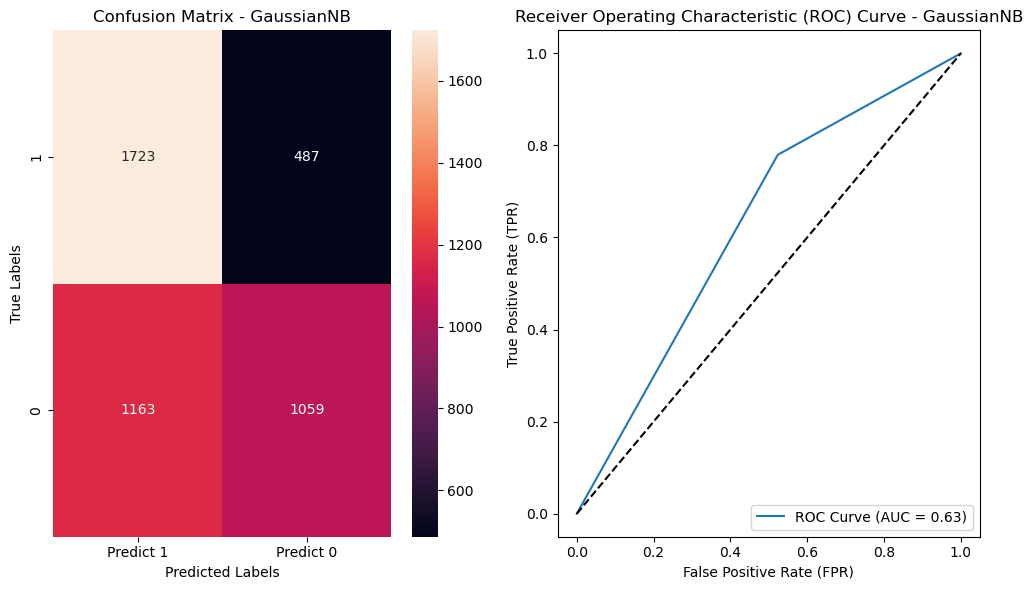

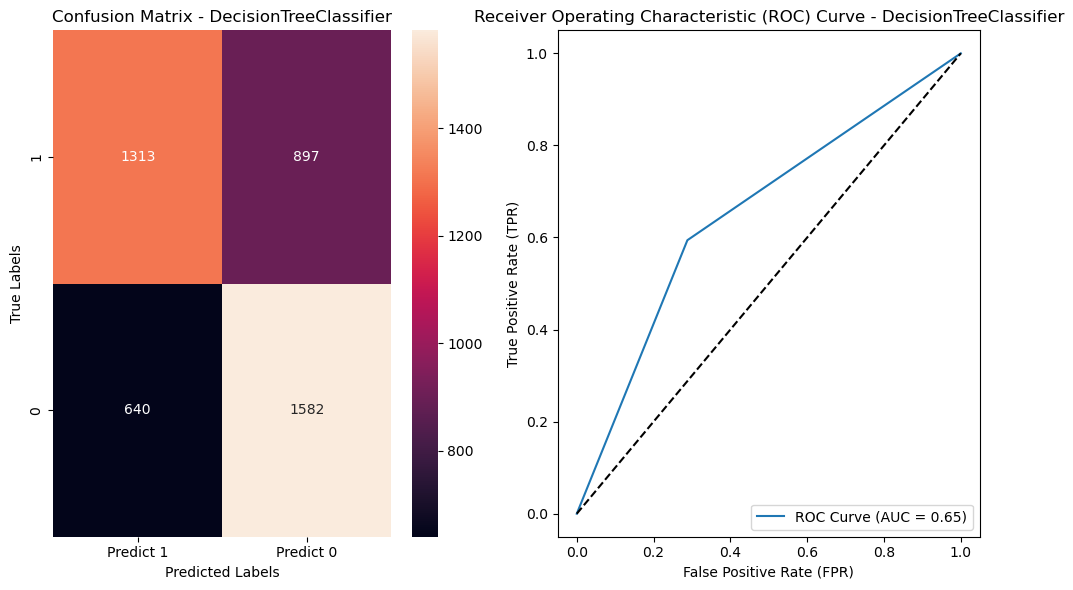

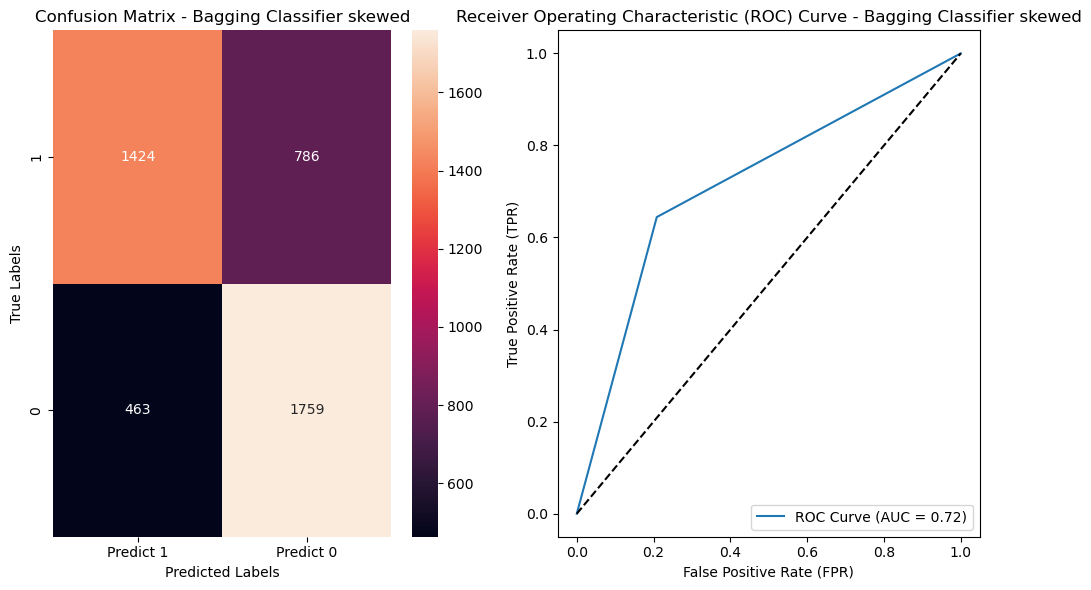

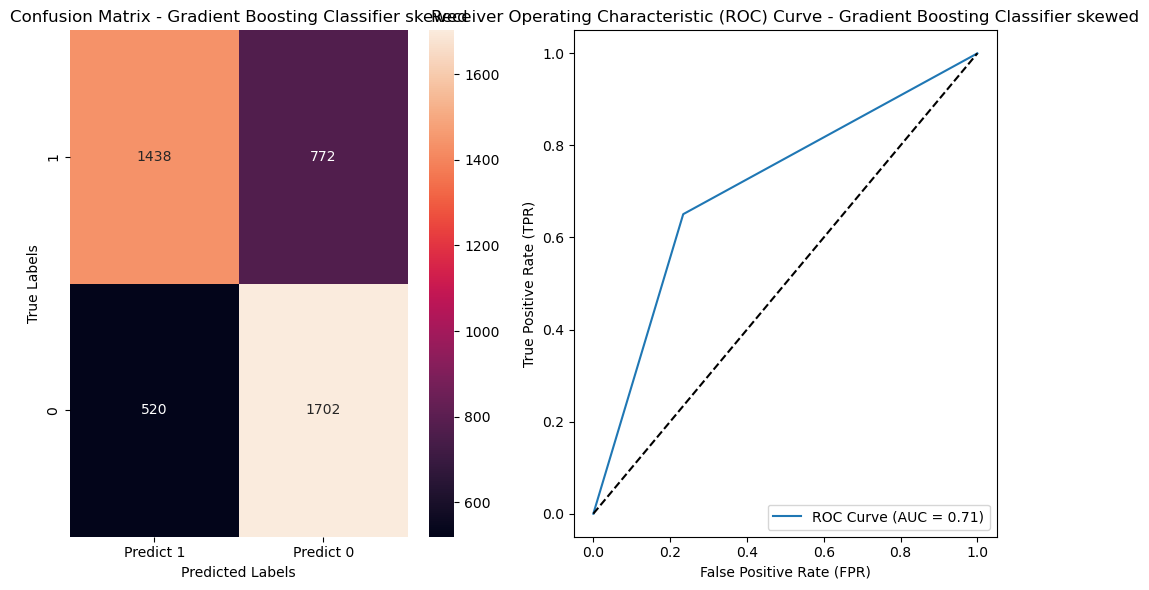

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics


def plot_metrics(y_test, predictions, model_name):
    
    cm = metrics.confusion_matrix(y_test, predictions, labels=[1, 0])
    df_cm = pd.DataFrame(cm, index=[i for i in ['1', '0']],
                         columns=[i for i in ['Predict 1', 'Predict 0']])
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    sns.heatmap(df_cm, annot=True, fmt='g')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix - {model_name}')

    
    fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)
    plt.subplot(1, 2, 2)
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {metrics.auc(fpr, tpr):.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {model_name}')
    plt.legend(loc='lower right')

    plt.tight_layout()
    plt.show()

classifiers = ['Logistic_Regression', 'BaggingClassifier', 'SVC', 'RandomForest',
               'GradientBoostingClassifier', 'GaussianNB', 'DecisionTreeClassifier',
               'Bagging Classifier skewed', 'Gradient Boosting Classifier skewed']
models = [model, model_bc, model_svc, model_rf,model_gbc,model_gnb,model_dt,model_bcsk,model_gbcsk]

predictions_list = [model.predict(X_test) for model in models]

for classifier, predictions in zip(classifiers, predictions_list):
    plot_metrics(y_test, predictions, classifier)


## Since Bagging classifier has the best accuracy we imply the model on test data :

In [115]:
dg.dtypes

age          int64
job          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         int64
contact      int64
day          int64
month        int64
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int64
dtype: object

In [116]:
dg = dg.drop(['pdays','previous'],axis = 1)

In [117]:
y_pred = model_bcsk.predict(dg)  
dg['y_bool_predicted'] = y_pred

In [118]:
dg.sample(10)

age  job  marital  education  default  balance  housing  loan  contact  \
1995   36    4        1          2        0      918        0     0        0   
957    22    5        0          1        0      796        1     0        0   
2827   34    0        1          1        0      276        0     0        0   
5937   58    9        1          1        0     1474        0     0        2   
7437   25    5        1          0        0      389        1     1        0   
4520   40    7        1          1        0     1759        1     0        0   
4839   68    5        2          2        0      624        1     1        0   
1835   22    0        1          1        1      303        1     0        0   
8097   31    9        0          1        0     4017        1     1        2   
187    32    5        1          1        0      172        0     0        0   

      day  month  duration  campaign  poutcome  y_bool_predicted  
1995    1      5       130         1         3                 0  
957    10      9       383         2         3                 0  
2827   10      6       108         1         3                 0  
5937   31      5       123         2         3                 0  
7437    1      1       658         3         3                 0  
4520    2      9        59         1         3                 0  
4839    2      0       151         3         3                 0  
1835   19      9       277         2         3                 0  
8097   16      6        39         1         3                 0  
187    11      6        28         2         3                 0

# ----------------------------------------------------------------------------

In [119]:
from joblib import dump

In [155]:
dump(model_bcsk, './../savedModels/subscriber_main_model.joblib')

['./../savedModels/subscriber_main_model.joblib']